In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('salary_data_cleaned.csv')

In [4]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,company_txt,job_state,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn,SQL_yn,tableau_yn
0,Messaging Specialist,$9-$14 Per Hour(Glassdoor est.),"Because you belong at Twilio\r\n\r\nThe Who, W...",4.0,Twilio\r\n4.0,Remote,-1,1001 to 5000 Employees,2008,Company - Public,...,Twilio\r\n,Remote,12,0,0,0,0,0,0,0
1,Customer Service Representative $17.00/hour,$9-$14 Per Hour(Glassdoor est.),POSITION PURPOSE\r\nThe Customer Service Repre...,3.7,Home Depot\r\n3.7,"Ogden, UT",-1,10000+ Employees,1978,Company - Public,...,Home Depot\r\n,UT,42,0,0,0,0,1,0,0
2,Controller / HR,$9-$14 Per Hour(Glassdoor est.),CONTROLLER/HR*Company Information: Position co...,-1.0,"Day Builders, Inc.","Preston, ID",-1,1 to 50 Employees,-1,Company - Private,...,"Day Builders, Inc.",ID,-1,0,0,0,0,1,0,0
3,Peddle Route Driver,$9-$14 Per Hour(Glassdoor est.),"Five Star Transport Solutions, Inc. is current...",-1.0,Five Star Transport Solutions,"Saint Joseph, MN",-1,51 to 200 Employees,-1,Unknown,...,Five Star Transport Solutions,MN,-1,0,0,0,1,0,0,0
4,Tax Accountant,$9-$14 Per Hour(Glassdoor est.),Join our growing team of full service agricult...,4.3,Farm Credit Services\r\n4.3,"Mandan, ND",-1,1001 to 5000 Employees,1916,Other Organization,...,Farm Credit Services\r\n,ND,104,0,0,0,0,1,0,0


## More Data Clean Up

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr' in title.lower():
        return 'jr'
    else:
        return 'na'
    

In [6]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [7]:
df.job_simp.value_counts()

na                333
analyst           235
data engineer     184
data scientist    157
mle                44
manager            40
director            4
Name: job_simp, dtype: int64

In [8]:
df['seniority'] = df['Job Title'].apply(seniority)

In [9]:
df.seniority.value_counts()

na        643
senior    352
jr          2
Name: seniority, dtype: int64

In [10]:
df.job_state.value_counts()

CA        182
VA         92
MA         90
MD         57
NY         46
TX         40
WA         37
PA         35
NJ         34
FL         33
IL         30
TN         30
Remote     29
MO         22
NC         19
WI         19
US         19
CT         17
OH         17
MN         16
DC         15
MI         14
CO         14
GA         13
SC         12
UT         11
IA          9
AZ          9
AL          5
ID          4
NH          3
KS          3
OR          3
NV          2
NE          2
MT          2
DE          2
IN          2
PR          2
ND          2
ME          1
MS          1
VI          1
SD          1
Name: job_state, dtype: int64

In [11]:
# Job description lengths
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      4412
1      3126
2      2429
3      2500
4      1612
       ... 
992    4691
993    3887
994    1858
995    3884
996    7272
Name: desc_len, Length: 997, dtype: int64

In [12]:
df['Competitors'].value_counts()

-1    997
Name: Competitors, dtype: int64

In [13]:
# hourly wage to annual
# multiply by 2000/1000 = 2 
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis=1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis=1)

In [14]:
df['avg_salary'] = (df.min_salary + df.max_salary)/2

In [15]:
df[df.hourly==1][['hourly','min_salary','max_salary', 'avg_salary']]

,hourly,min_salary,max_salary,avg_salary
0,1,18,28,23.0
1,1,18,28,23.0
2,1,18,28,23.0
3,1,18,28,23.0
4,1,18,28,23.0
...,...,...,...,...
769,1,32,58,45.0
770,1,32,58,45.0
771,1,32,58,45.0
772,1,32,58,45.0


In [16]:
# remove \n and \r from company text
df['company_txt'] = df['company_txt'].apply(lambda x: x.replace('\n', ''))
df['company_txt'] = df['company_txt'].apply(lambda x: x.replace('\r', ''))

In [17]:
df['company_txt']

0                                     Twilio
1                                 Home Depot
2                         Day Builders, Inc.
3              Five Star Transport Solutions
4                       Farm Credit Services
                       ...                  
992                  Christian Care Ministry
993                                  Niantic
994                          OSI Engineering
995    St. Jude Children's Research Hospital
996                    Emergent BioSolutions
Name: company_txt, Length: 997, dtype: object

## Explore Data

In [18]:
df.describe()

,Rating,Headquarters,Founded,Competitors,hourly,min_salary,max_salary,avg_salary,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn,SQL_yn,tableau_yn,desc_len
count,997.000000,997.0,997.000000,997.0,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000
mean,3.506921,-1.0,1729.676028,-1.0,0.062187,75.369107,128.969910,102.169509,30.729188,0.476429,0.007021,0.190572,0.240722,0.532598,0.479438,0.208626,3886.797392
std,1.269887,0.0,665.313344,0.0,0.241615,26.409962,42.786726,34.467447,34.077824,0.499695,0.083539,0.392949,0.427737,0.499187,0.499828,0.406530,1597.125196
min,-1.000000,-1.0,-1.000000,-1.0,0.000000,18.000000,28.000000,23.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,112.000000
25%,3.300000,-1.0,1957.000000,-1.0,0.000000,56.000000,97.000000,76.500000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2873.000000
50%,3.700000,-1.0,1994.000000,-1.0,0.000000,70.000000,127.000000,97.000000,20.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3725.000000
75%,4.200000,-1.0,2006.000000,-1.0,0.000000,97.000000,158.000000,127.500000,44.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,4721.000000
max,5.000000,-1.0,2019.000000,-1.0,1.000000,121.000000,201.000000,158.000000,239.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12136.000000


<AxesSubplot:>

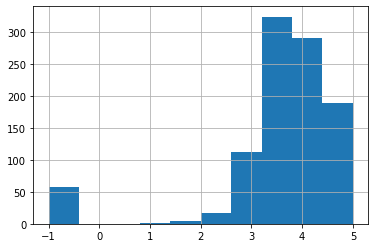

In [19]:
df.Rating.hist()

<AxesSubplot:>

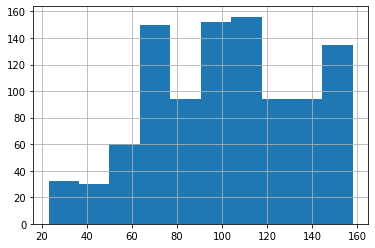

In [20]:
df.avg_salary.hist()

<AxesSubplot:>

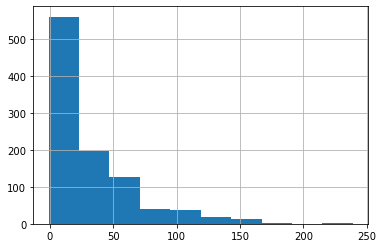

In [21]:
df.age.hist()

<AxesSubplot:>

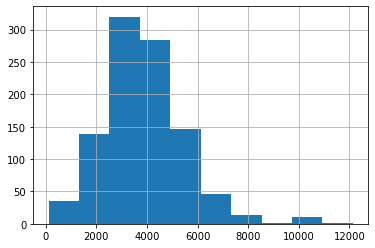

In [22]:
df.desc_len.hist()

<AxesSubplot:>

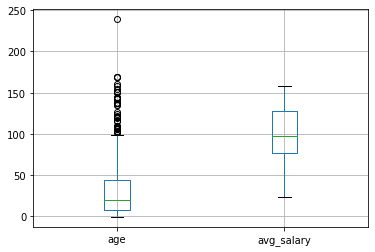

In [23]:
df.boxplot(column = ['age', 'avg_salary'])

<AxesSubplot:>

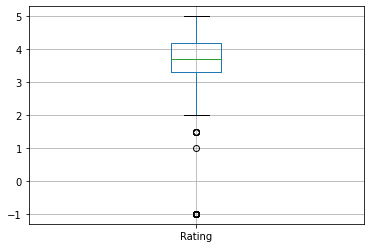

In [24]:
df.boxplot(column = 'Rating')

In [25]:
df[['age','avg_salary','Rating','desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,0.012737,0.178806,0.107282
avg_salary,0.012737,1.000000,0.159498,0.092200
Rating,0.178806,0.159498,1.000000,0.065476
desc_len,0.107282,0.092200,0.065476,1.000000


<AxesSubplot:>

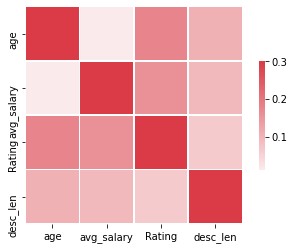

In [26]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len']].corr(),vmax=0.3, center=0, cmap=cmap,
           square=True, linewidth=0.5, cbar_kws={"shrink": 0.5})

In [27]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'min_salary', 'max_salary', 'avg_salary', 'company_txt',
       'job_state', 'age', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn',
       'excel_yn', 'SQL_yn', 'tableau_yn', 'job_simp', 'seniority',
       'desc_len'],
      dtype='object')

In [28]:
df_cat = df[['Location','Size','Type of ownership', 'Industry','Sector','Revenue','company_txt', 'job_state', 
    'python_yn', 'R_yn', 'spark_yn', 'aws_yn','excel_yn', 'SQL_yn', 'tableau_yn', 'job_simp', 'seniority' ]]

Graph for Location: total = 271


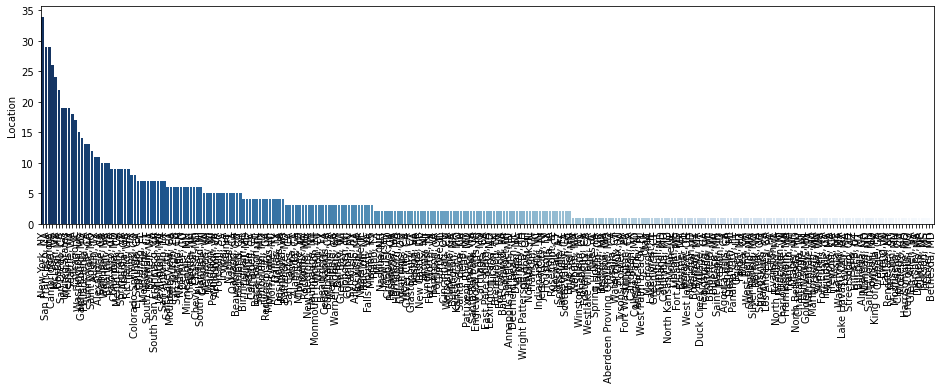

Graph for Size: total = 9


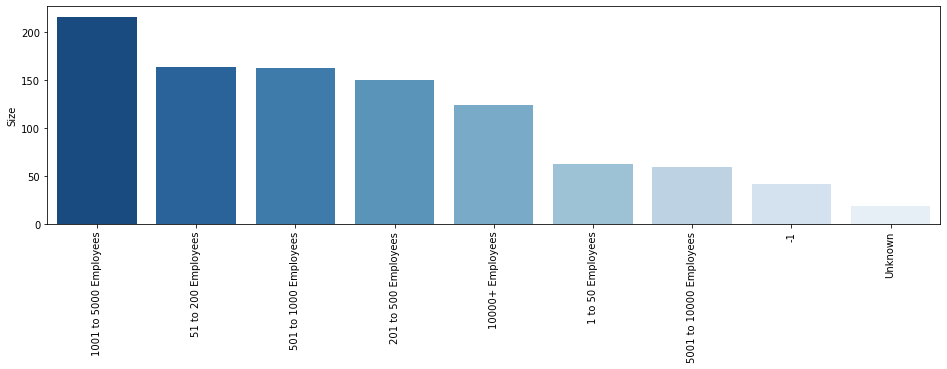

Graph for Type of ownership: total = 13


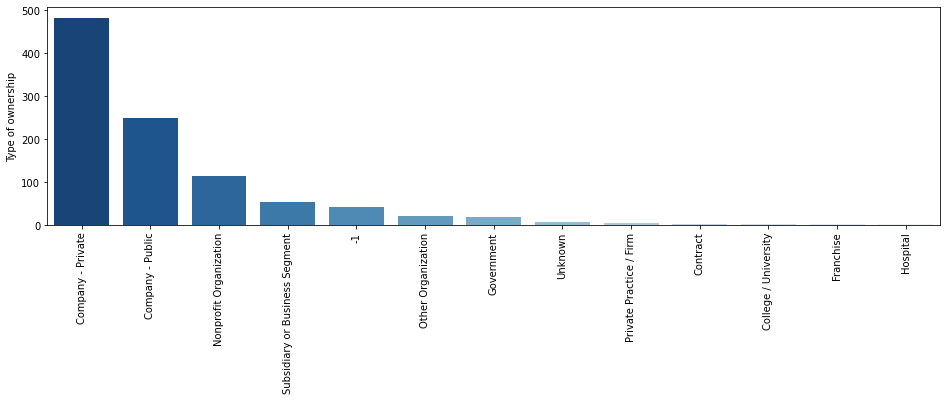

Graph for Industry: total = 64


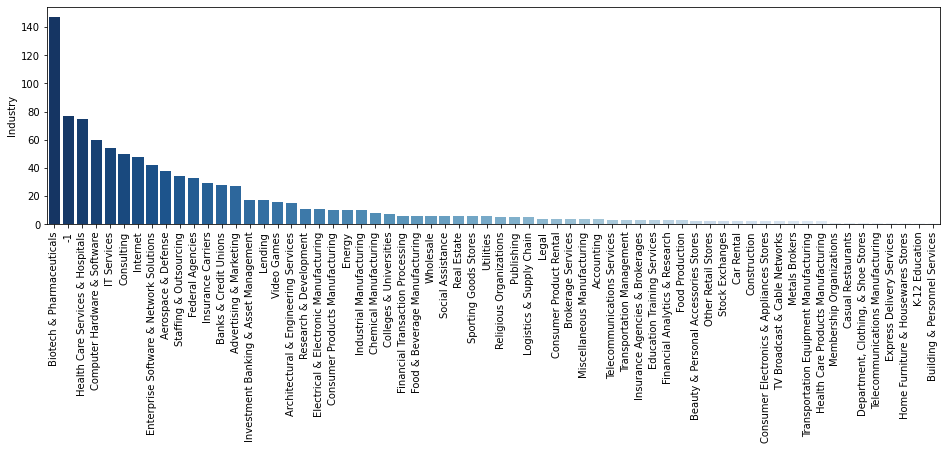

Graph for Sector: total = 25


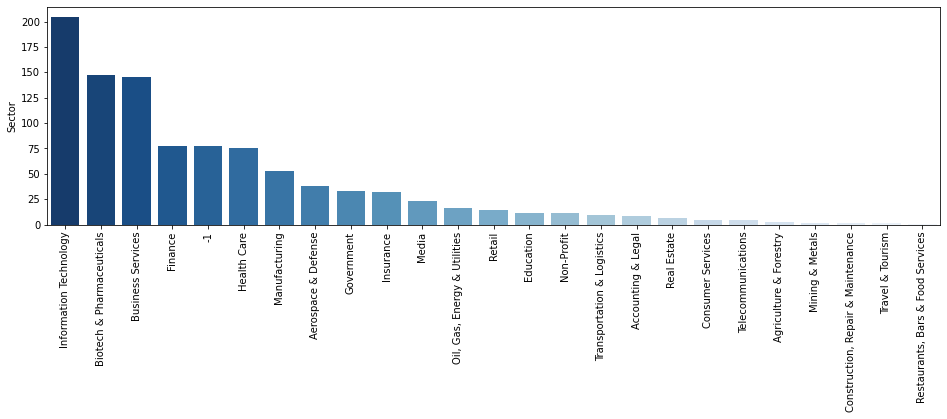

Graph for Revenue: total = 14


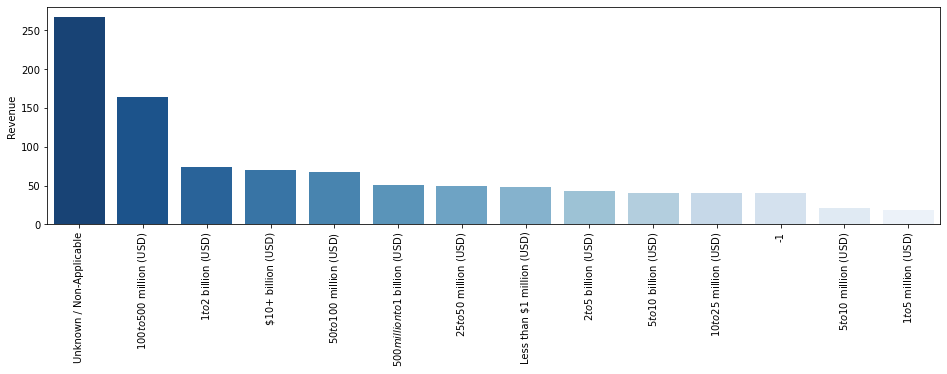

Graph for company_txt: total = 484


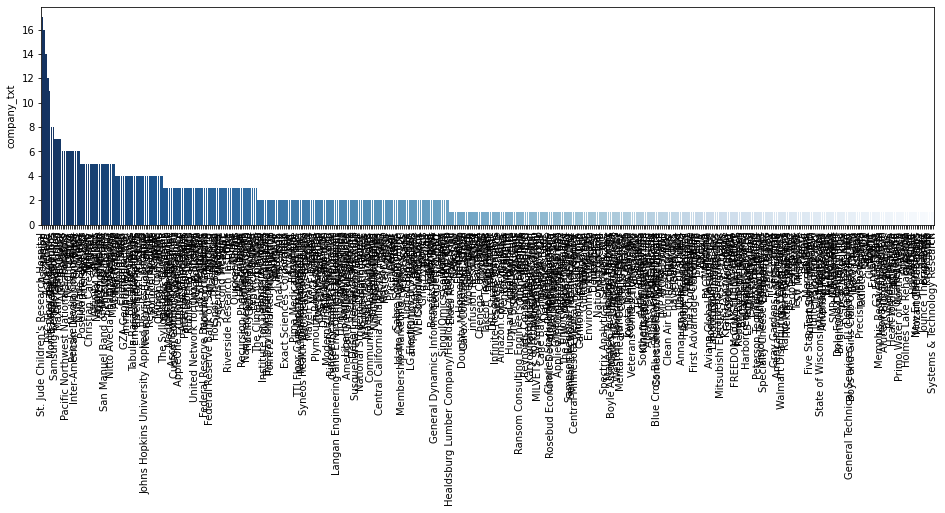

Graph for job_state: total = 44


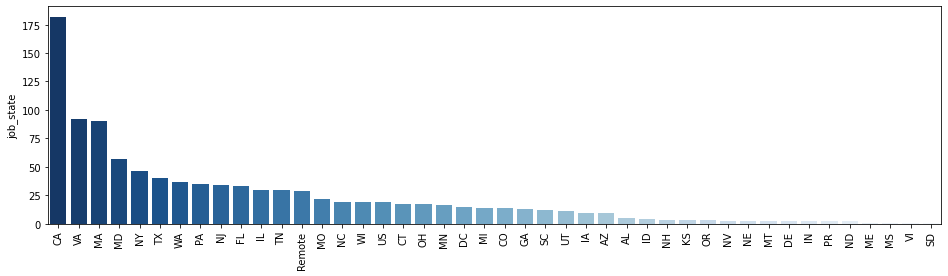

Graph for python_yn: total = 2


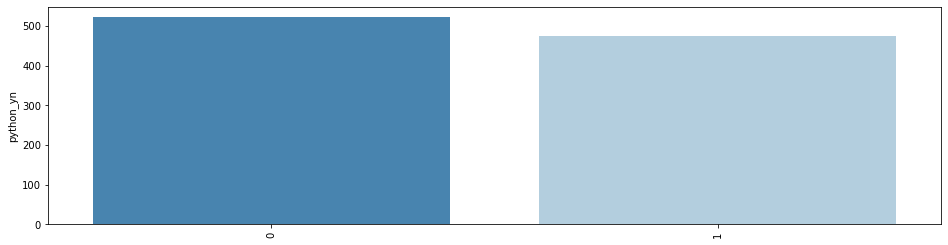

Graph for R_yn: total = 2


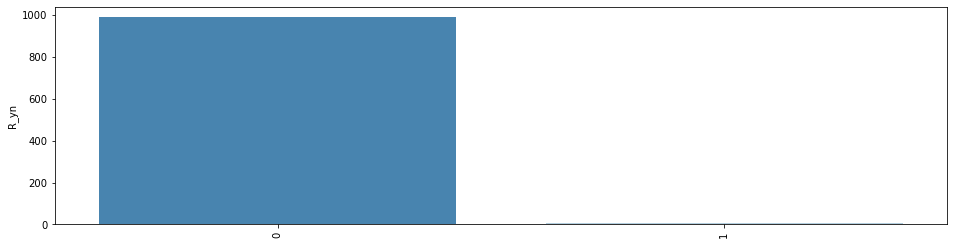

Graph for spark_yn: total = 2


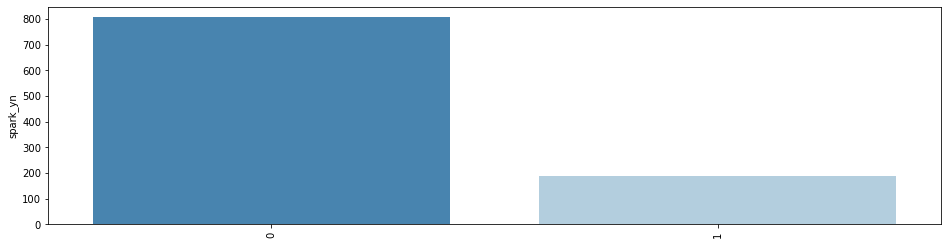

Graph for aws_yn: total = 2


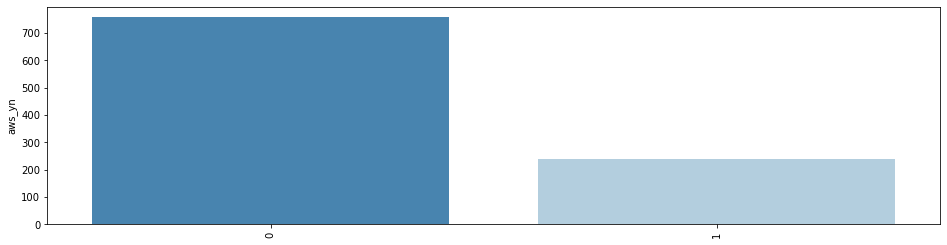

Graph for excel_yn: total = 2


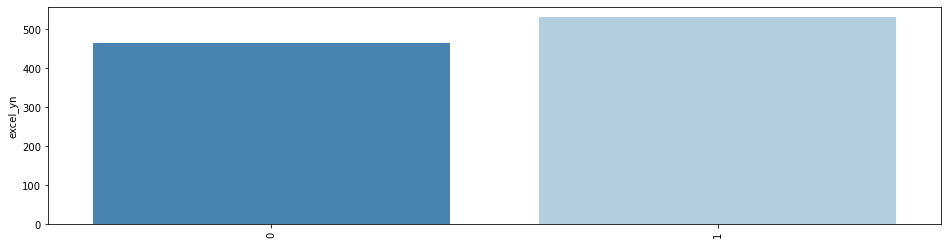

Graph for SQL_yn: total = 2


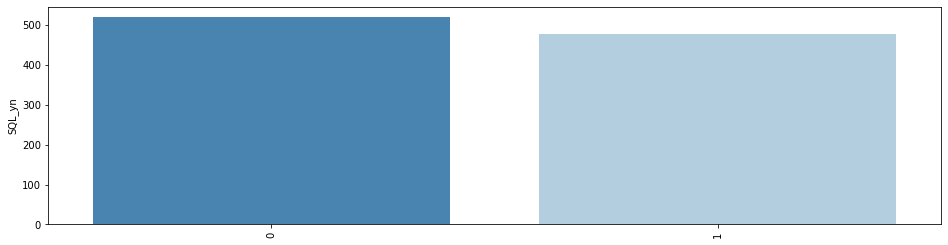

Graph for tableau_yn: total = 2


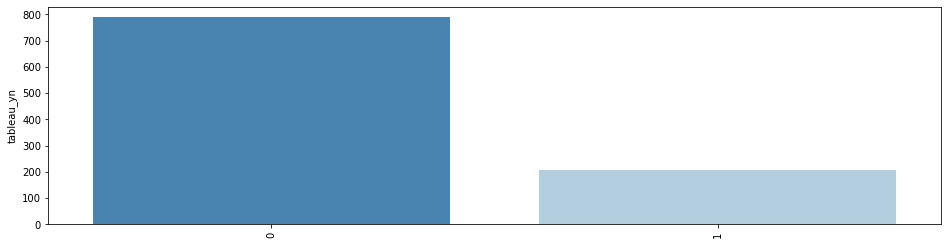

Graph for job_simp: total = 7


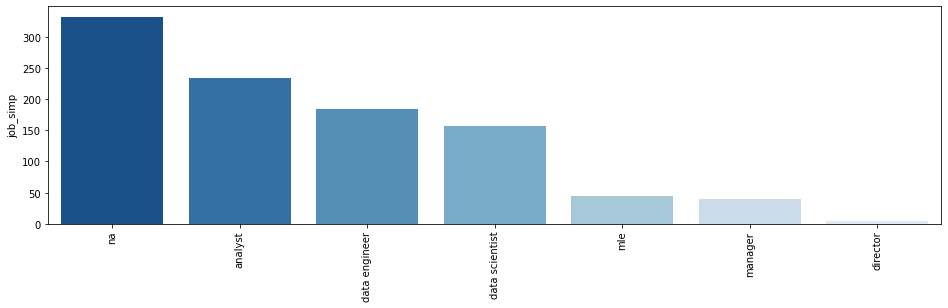

Graph for seniority: total = 3


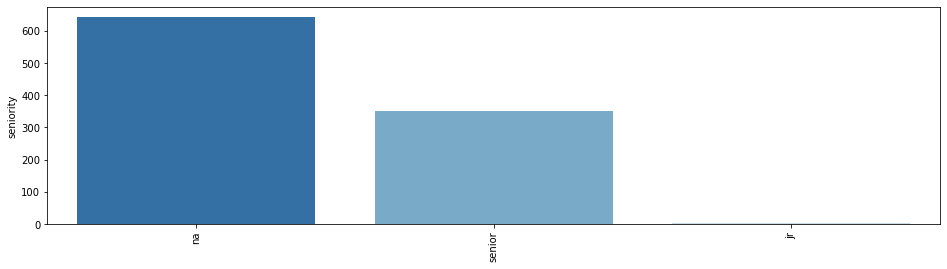

In [29]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("Graph for %s: total = %d" % (i, len(cat_num)))
    plt.figure(figsize=(16,4))
    chart = sns.barplot(x=cat_num.index, y=cat_num, palette="Blues_r")
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Graph for Location: total = 20


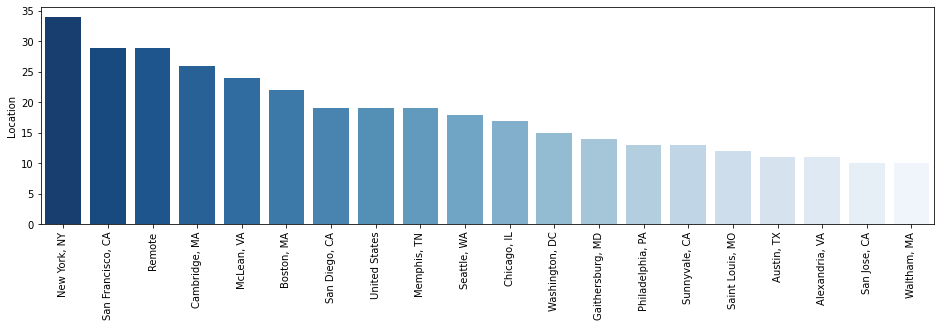

Graph for company_txt: total = 20


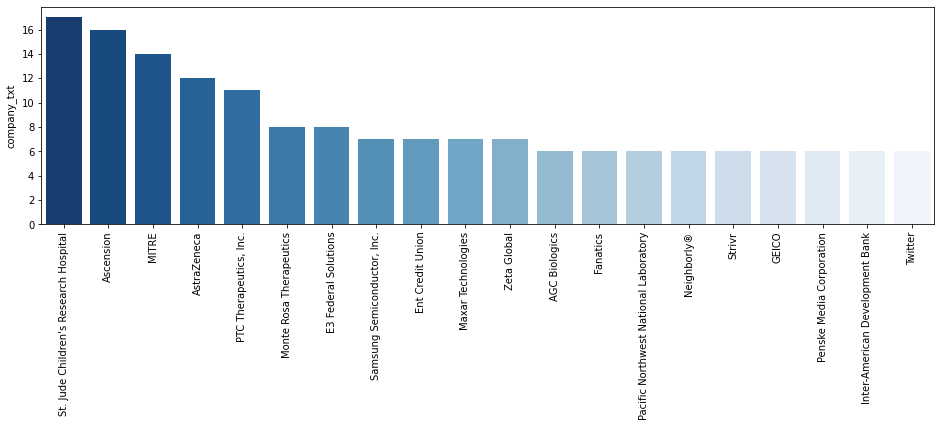

Graph for Industry: total = 20


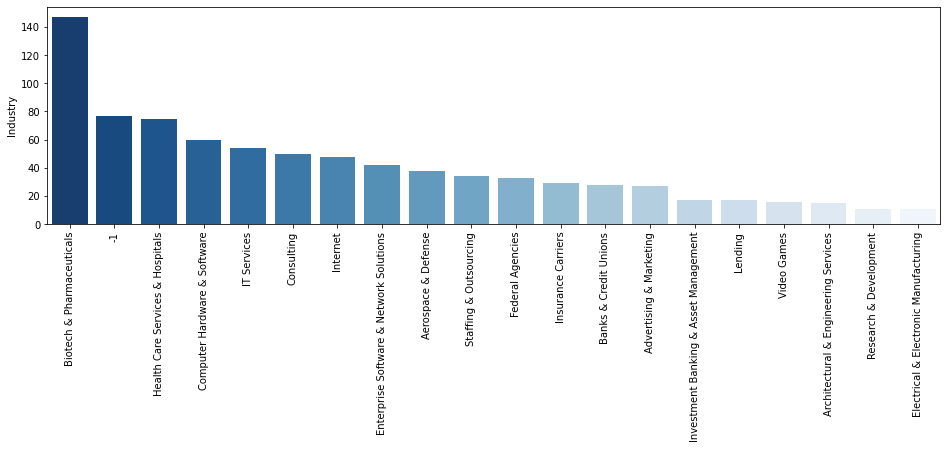

In [30]:
for i in df_cat[['Location', 'company_txt', 'Industry']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("Graph for %s: total = %d" % (i, len(cat_num)))
    plt.figure(figsize=(16,4))
    chart = sns.barplot(x=cat_num.index, y=cat_num, palette="Blues_r")
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [31]:
pd.pivot_table(df, index='job_simp', values='avg_salary')

,avg_salary
job_simp,
analyst,107.857447
data engineer,105.146739
data scientist,106.958599
director,133.750000
manager,107.562500
mle,107.954545
na,92.460961


In [32]:
pd.pivot_table(df, index=['job_simp', 'seniority'] , values='avg_salary')

avg_salary
job_simp       seniority            
analyst        jr          95.500000
               na         110.248120
               senior     104.925000
data engineer  na         106.384298
               senior     102.769841
data scientist na         105.814433
               senior     108.808333
director       na         133.750000
manager        na         103.903846
               senior     114.357143
mle            na          99.363636
               senior     116.545455
na             na          90.800000
               senior      96.747312

In [33]:
pd.set_option('display.max_rows', None)

In [34]:
pd.pivot_table(df, index=['job_state', 'job_simp'], values='avg_salary', aggfunc='count').sort_values('job_state', ascending=True)

avg_salary
job_state job_simp                  
AL        analyst                  3
          data engineer            2
AZ        analyst                  3
          data engineer            2
          na                       4
CA        analyst                 26
          data engineer           28
          data scientist          32
          manager                 10
          mle                     24
          na                      62
CO        analyst                  9
          data engineer            3
          manager                  1
          mle                      1
CT        manager                  2
          data scientist           2
          analyst                 11
          data engineer            2
DC        analyst                  6
          data engineer            3
          data scientist           1
          na                       5
DE        analyst                  1
          na                       1
FL        analyst                 18
          data engineer            1
          manager                  1
          na                      13
GA        manager                  1
          data scientist           2
          na                       1
          analyst                  4
          data engineer            5
IA        mle                      3
          data engineer            2
          analyst                  4
ID        analyst                  2
          na                       2
IL        analyst                 12
          data engineer           10
          data scientist           3
          na                       5
IN        data engineer            2
KS        manager                  3
MA        analyst                  6
          data engineer            7
          data scientist          18
          director                 2
          manager                  1
          mle                      4
          na                      52
MD        na                      26
          data scientist          10
          data engineer            9
          analyst                 12
ME        manager                  1
MI        data engineer            6
          manager                  2
          mle                      2
          na                       4
MN        analyst                  7
          data engineer            1
          data scientist           1
          director                 2
          na                       5
MO        analyst                  4
          data engineer            6
          data scientist           9
          na                       3
MS        analyst                  1
MT        na                       2
NC        analyst                  3
          data engineer            2
          data scientist           3
          na                      11
ND        analyst                  1
          na                       1
NE        na                       2
NH        data engineer            1
          analyst                  2
NJ        analyst                  7
          data engineer            4
          data scientist           2
          manager                  4
          na                      17
NV        na                       2
NY        mle                      1
          na                       6
          manager                  4
          data scientist          13
          data engineer           13
          analyst                  9
OH        analyst                  3
          data scientist           2
          na                      12
OR        analyst                  2
          data scientist           1
PA        na                       7
          data scientist           1
          data engineer           11
          analyst                 16
PR        na                       2
Remote    analyst                  9
          data engineer            8
          data scientist           8
          na                  

In [35]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index='job_state', values='avg_salary').sort_values('avg_salary', ascending=False)

,avg_salary
job_state,
UT,133.375000
DC,132.000000
MA,120.611111
PA,120.500000
CA,119.140625
US,117.000000
VA,111.947368
WI,109.500000
MO,104.500000


In [36]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'min_salary', 'max_salary', 'avg_salary', 'company_txt',
       'job_state', 'age', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn',
       'excel_yn', 'SQL_yn', 'tableau_yn', 'job_simp', 'seniority',
       'desc_len'],
      dtype='object')

In [37]:
# rating, industry, sector, revenue, hourly, python, r, spak, aws, excel, sql, tableau, desc_len, type of ownership

In [38]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'hourly', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn','excel_yn', 'SQL_yn', 'tableau_yn', 'desc_len', 'Type of ownership', 'avg_salary']]

In [39]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index=i, values='avg_salary').sort_values('avg_salary', ascending=False))

Rating
        avg_salary
Rating            
 2.1    129.000000
 2.7    128.062500
 2.2    124.500000
 4.6    124.320000
 4.2    114.986842
 3.8    108.695652
 4.5    107.977273
 5.0    107.902778
 3.2    106.636364
 2.6    105.937500
 2.9    105.900000
 3.6    105.092593
 3.9    104.706522
 3.5    104.561728
 3.3    103.848101
 4.0    103.583333
 4.3    103.300000
 3.0    102.515152
 4.9    101.166667
 4.7    100.107143
 3.4     99.990385
 4.4     99.711538
 2.8     98.750000
 3.1     95.964286
 4.8     94.777778
 4.1     94.030612
 2.5     93.000000
 3.7     88.222222
 2.0     85.375000
 1.5     85.300000
-1.0     80.710526
 2.4     76.250000
 1.0     23.000000
Industry
                                          avg_salary
Industry                                            
Education Training Services               158.000000
Logistics & Supply Chain                  141.800000
Transportation Management                 136.333333
Religious Organizations                   135.400000
C

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [40]:
pd.pivot_table(df_pivots, index='Revenue', columns='python_yn', values='avg_salary', aggfunc='count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),44,30
$1 to $5 million (USD),9,10
$10 to $25 million (USD),15,26
$10+ billion (USD),41,29
$100 to $500 million (USD),94,70
$2 to $5 billion (USD),14,29
$25 to $50 million (USD),23,27
$5 to $10 billion (USD),23,18
$5 to $10 million (USD),8,13


In [41]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

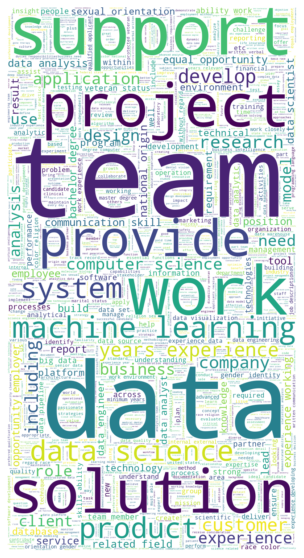

In [42]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc = WordCloud(background_color='white', random_state=1, stopwords=STOPWORDS, max_words=2000, width=800, height=1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()